In [3]:
# PCA for decorrelation

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as skmet

data = pd.read_csv('data.csv', delimiter=",", header=None).values
print(data.shape)

print(np.corrcoef(data.T))





(50, 2)
[[1.        0.7355261]
 [0.7355261 1.       ]]


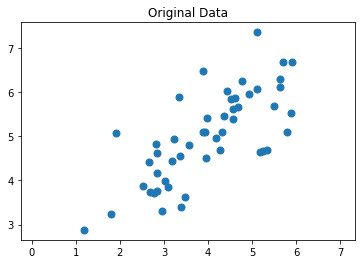

In [4]:
plt.plot(data[:,0], data[:, 1], '.', markersize = 14)
plt.axis('equal');
plt.title('Original Data');
plt.show()

In [5]:
mu = data.mean(axis = 0)
sigma = data.std(axis = 0)

print(mu)
print(sigma)

Xnorm = (data-mu)/sigma
print(Xnorm[0:5, :])


[3.989264 5.002806]
[1.16126805 1.01312579]
[[-0.52327626 -1.59279926]
 [ 0.46383434  0.84036357]
 [-1.14836881 -0.58315168]
 [-1.05407533 -1.27072671]
 [-0.98397954 -0.81658765]]


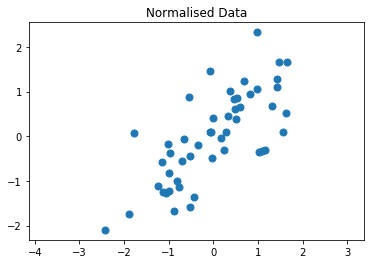

In [6]:
plt.plot(Xnorm[:,0], Xnorm[:, 1], '.', markersize = 14)
plt.axis('equal');
plt.title('Normalised Data');
plt.show()

In [7]:
a = np.array([(2,-5),(1,1)])
#b = np.array([1,1])
print(np.linalg.inv(a))

[[ 0.14285714  0.71428571]
 [-0.14285714  0.28571429]]


In [8]:
# Covariance matrix

m = len(Xnorm)
covmat = np.dot(Xnorm.T, Xnorm)/m
print(covmat)

#covmat2 = np.corrcoef(Xnorm.T)
#print(covmat2)

[[1.        0.7355261]
 [0.7355261 1.       ]]


In [9]:
# Link to PCA via EVD

S,U = np.linalg.eig(covmat)

print('Eigen Value:{}'. format(S))
print('Eigen Vectors:')
print(U)

print(np.linalg.det(U))
print(U.T)
print(np.linalg.inv(U))
print(np.dot(U[:,0], U[:,1]))

Eigen Value:[1.7355261 0.2644739]
Eigen Vectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
1.0
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
0.0


In [11]:
Z = np.dot(Xnorm, U)

In [13]:
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
fig.subplot

axs[0].scatter(data[:,0], data[:,1])
axs[0].scatter(Xnorm[:,0], Xnorm[:,1])
axs[1].scatter(Z[:,0], Z[:,1])

NameError: name 'axs' is not defined

In [15]:
# number of PC to retain

K = 1
Ured = U[:,0:K]

Zred = np.dot(Xnorm, Ured)
varExplained = S/np.sum(S)*100
varExplained = np.round(varExplained,2)
print(varExplained)

print(Zred.shape)
print(Ured.shape)

[86.78 13.22]
(50, 1)
(2, 1)


In [ ]:
# Recover data
xrec = np.dot(Zred)
